In [39]:
%store -r X_PCA2

In [40]:
%store -r y

In [41]:
#kmeans

In [42]:
from sklearn.metrics import silhouette_score

In [43]:
from sklearn.cluster import KMeans

In [44]:
from matplotlib import pyplot as plt

In [45]:
from matplotlib.colors import ListedColormap

In [46]:
color_list = ['red', 'blue', 'green', 'yellow', 'pink', 'purple', 'orange', 'brown', 'gray', 'magenta', 'cyan',
              'olive', 'maroon', 'gold', 'lime', 'indigo']

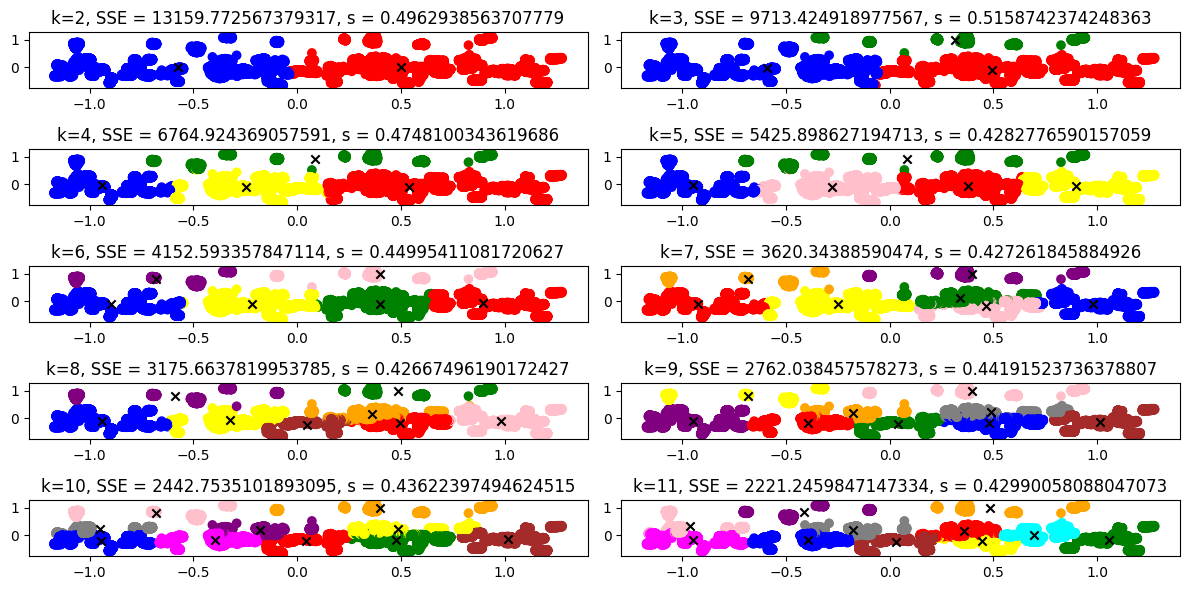

In [53]:
ks = range(2, 12)
inits = ['k-means++']
idx = 1
fig = plt.figure(figsize=(12, 6))
sse_scores = []
silhouette_scores = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init=10)
        kmeans.fit(X_PCA2)
        
        fig.add_subplot(int(len(ks)/2), 2, idx)
        idx += 1
        
        plt.scatter(X_PCA2.iloc[:, 0], X_PCA2.iloc[:, 1], c=kmeans.labels_, cmap= ListedColormap(color_list[:k]))
        
        centroids = pd.DataFrame(kmeans.cluster_centers_)
        plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='black', marker='x')
        
        sse_score = kmeans.inertia_
        sse_scores.append(sse_score)
        
        sil_score = silhouette_score(X_PCA2, kmeans.labels_)
        silhouette_scores.append(sil_score)
        
        plt.title(f'k={k}, SSE = {sse_score}, s = {sil_score}')
plt.tight_layout()

In [54]:
#sse i silhouette_score za razlicite k

Text(0.5, 1.0, 'Silhoutette score for different k')

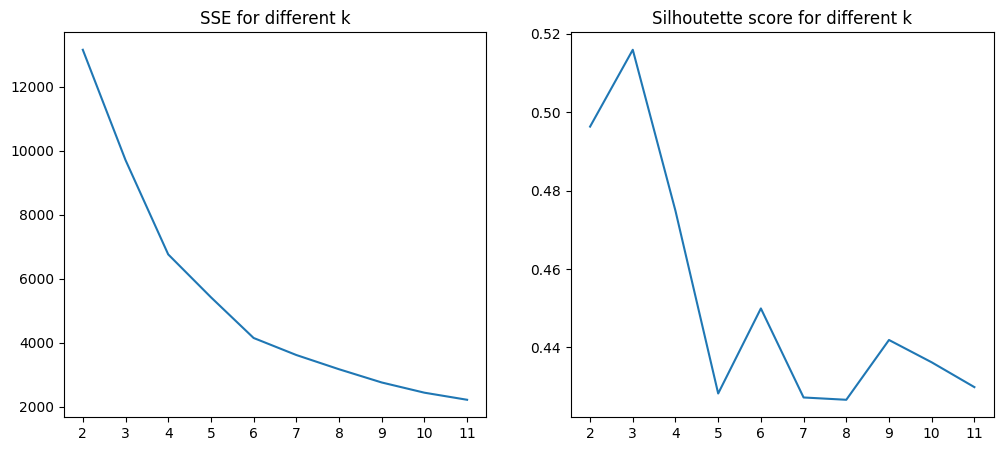

In [55]:
fig = plt.figure(figsize=(12, 5))

x = [f'{i}' for i in ks]

fig.add_subplot(1, 2, 1)
y1 = sse_scores
plt.plot(x, y1)
plt.title('SSE for different k')

fig.add_subplot(1, 2, 2)
y2 = silhouette_scores
plt.plot(x, y2)
plt.title('Silhoutette score for different k')

In [36]:
#poredjenje kmeans sa stvarnim klasama

Text(0.5, 1.0, 'real classes')

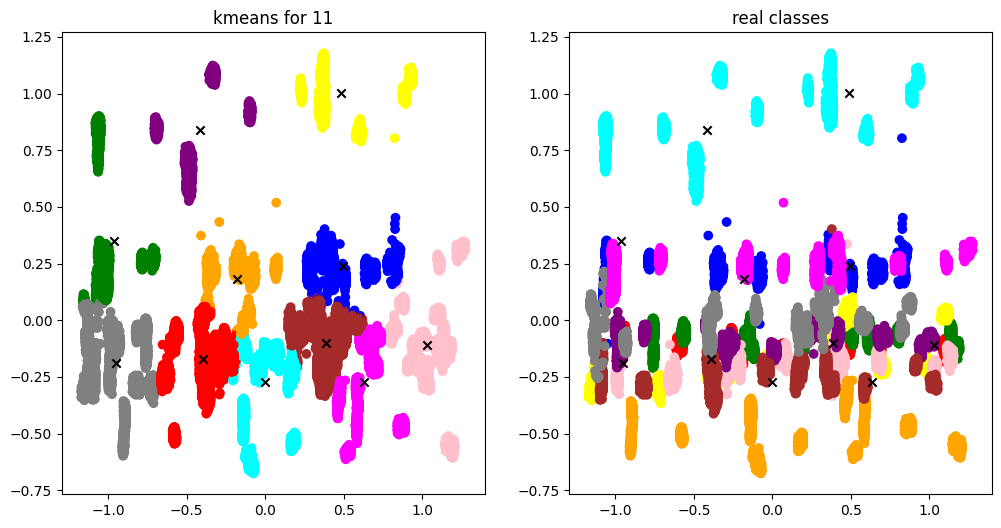

In [35]:
k=11
init = 'k-means++'
fig = plt.figure(figsize=(12, 6))


kmeans = KMeans(n_clusters=k, init=init, n_init=10)
kmeans.fit(X_PCA2)

fig.add_subplot(1, 2, 1)
plt.scatter(X_PCA2.iloc[:, 0], X_PCA2.iloc[:, 1], c=kmeans.labels_, cmap= ListedColormap(color_list[:k]))
centroids = pd.DataFrame(kmeans.cluster_centers_)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='black', marker='x')
plt.title(f'kmeans for {k}')

fig.add_subplot(1, 2, 2)
plt.scatter(X_PCA2.iloc[:, 0], X_PCA2.iloc[:, 1], c=y, cmap= ListedColormap(color_list[:k]))
centroids = pd.DataFrame(kmeans.cluster_centers_)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='black', marker='x')
plt.title(f'real classes')

In [24]:
#agglomerative

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
import pandas as pd

In [27]:
#agglomerative je algoritam O(n^2*logn) slozenosti, pa ne moze raditi nad celim skupom vec uzimamo uzorak

In [28]:
n = 11
numOfClassInstances = int(len(X_PCA2) / n)
numOfClassSamples = 1500
X_curr_sampled = []
instance_samples = []
for i in range(n):
    X_curr = X_PCA2.iloc[i*numOfClassInstances : (i+1)*numOfClassInstances, :]
    X_curr_sampled.append(X_curr.sample(numOfClassSamples))
    instance_samples.append(X_curr.sample(1))
X_PCA2_sampled = pd.concat(X_curr_sampled, axis=0)
#X_PCA2_sampled

In [29]:
#poredjenje algoritma pri pravljenju 11 klastera za razlicite vrste veza

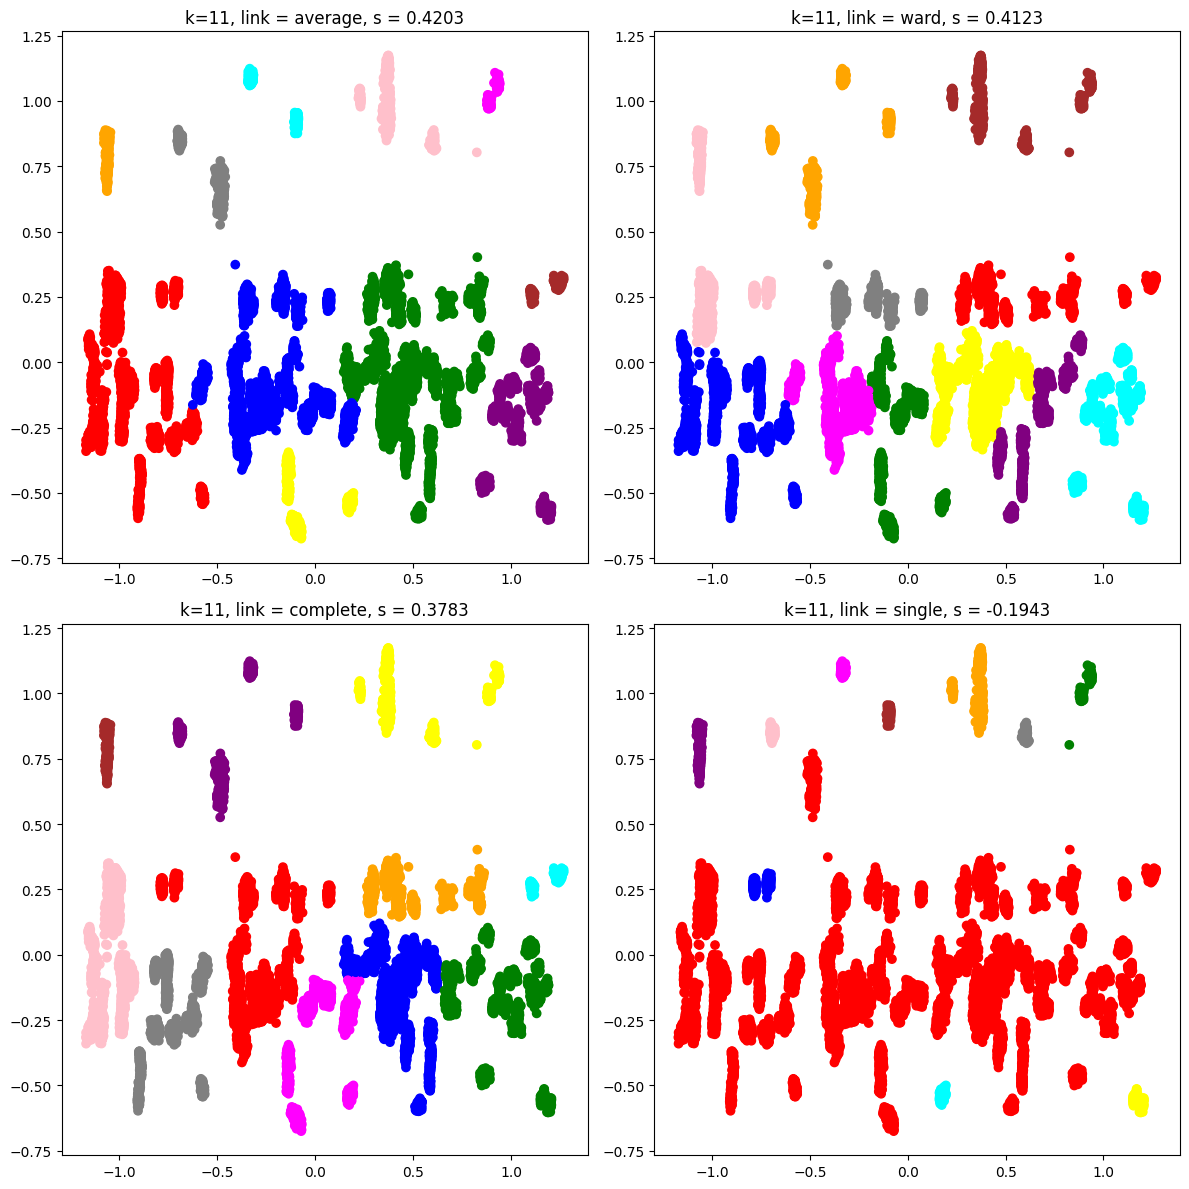

In [30]:
ks = [11]
linkages = ['average', 'ward', 'complete', 'single']
idx = 1
fig = plt.figure(figsize=(12, 12))

scores_for_linkages = []

for k in ks:
    for linkage in linkages:
        ac = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        ac.fit(X_PCA2_sampled)
        
        fig.add_subplot(2, 2, idx)
        idx += 1
    
        plt.scatter(X_PCA2_sampled.iloc[:, 0], X_PCA2_sampled.iloc[:, 1], c=ac.labels_, cmap= ListedColormap(color_list[:k]))
        
        score = round(silhouette_score(X_PCA2_sampled, ac.labels_), 4)
        scores_for_linkages.append(score)
        
        plt.title(f'k={k}, link = {linkage}, s = {score}')
plt.tight_layout()

In [31]:
#poredjenje agglomerative(average) sa stvarnim klasama

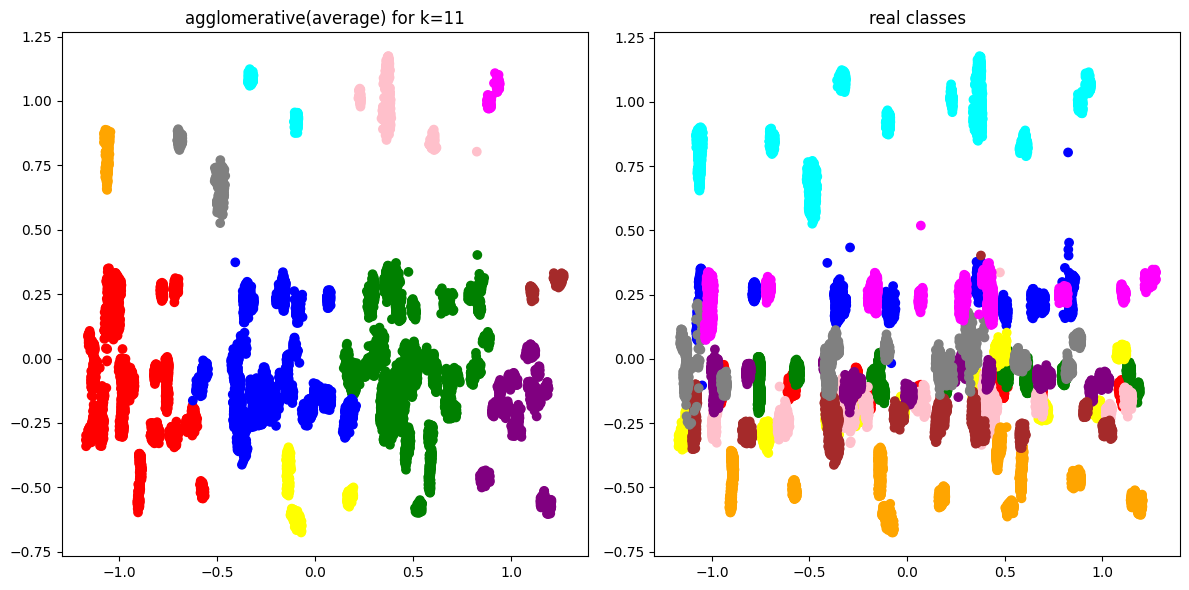

In [32]:
k=11
linkage = 'average'
fig = plt.figure(figsize=(12, 6))


ag = AgglomerativeClustering(n_clusters=11, linkage=linkage)
ag.fit(X_PCA2_sampled)

fig.add_subplot(1, 2, 1)
plt.scatter(X_PCA2_sampled.iloc[:, 0], X_PCA2_sampled.iloc[:, 1], c=ag.labels_, cmap= ListedColormap(color_list[:k]))
plt.title(f'agglomerative(average) for k={k}')

fig.add_subplot(1, 2, 2)
plt.scatter(X_PCA2.iloc[:, 0], X_PCA2.iloc[:, 1], c=y, cmap= ListedColormap(color_list[:k]))
plt.title(f'real classes')
          
plt.tight_layout()

In [18]:
#crtamo dendogram

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [17]:
Z = linkage(X_PCA2_sampled, method='average')
Z

array([[2.49000000e+02, 8.31000000e+02, 2.70544234e-05, 2.00000000e+00],
       [8.08100000e+03, 8.29300000e+03, 3.12136856e-05, 2.00000000e+00],
       [1.06840000e+04, 1.11240000e+04, 3.63727391e-05, 2.00000000e+00],
       ...,
       [3.29930000e+04, 3.29950000e+04, 1.06587644e+00, 8.64200000e+03],
       [3.29890000e+04, 3.29940000e+04, 1.12621864e+00, 7.85800000e+03],
       [3.29960000e+04, 3.29970000e+04, 1.16214062e+00, 1.65000000e+04]])

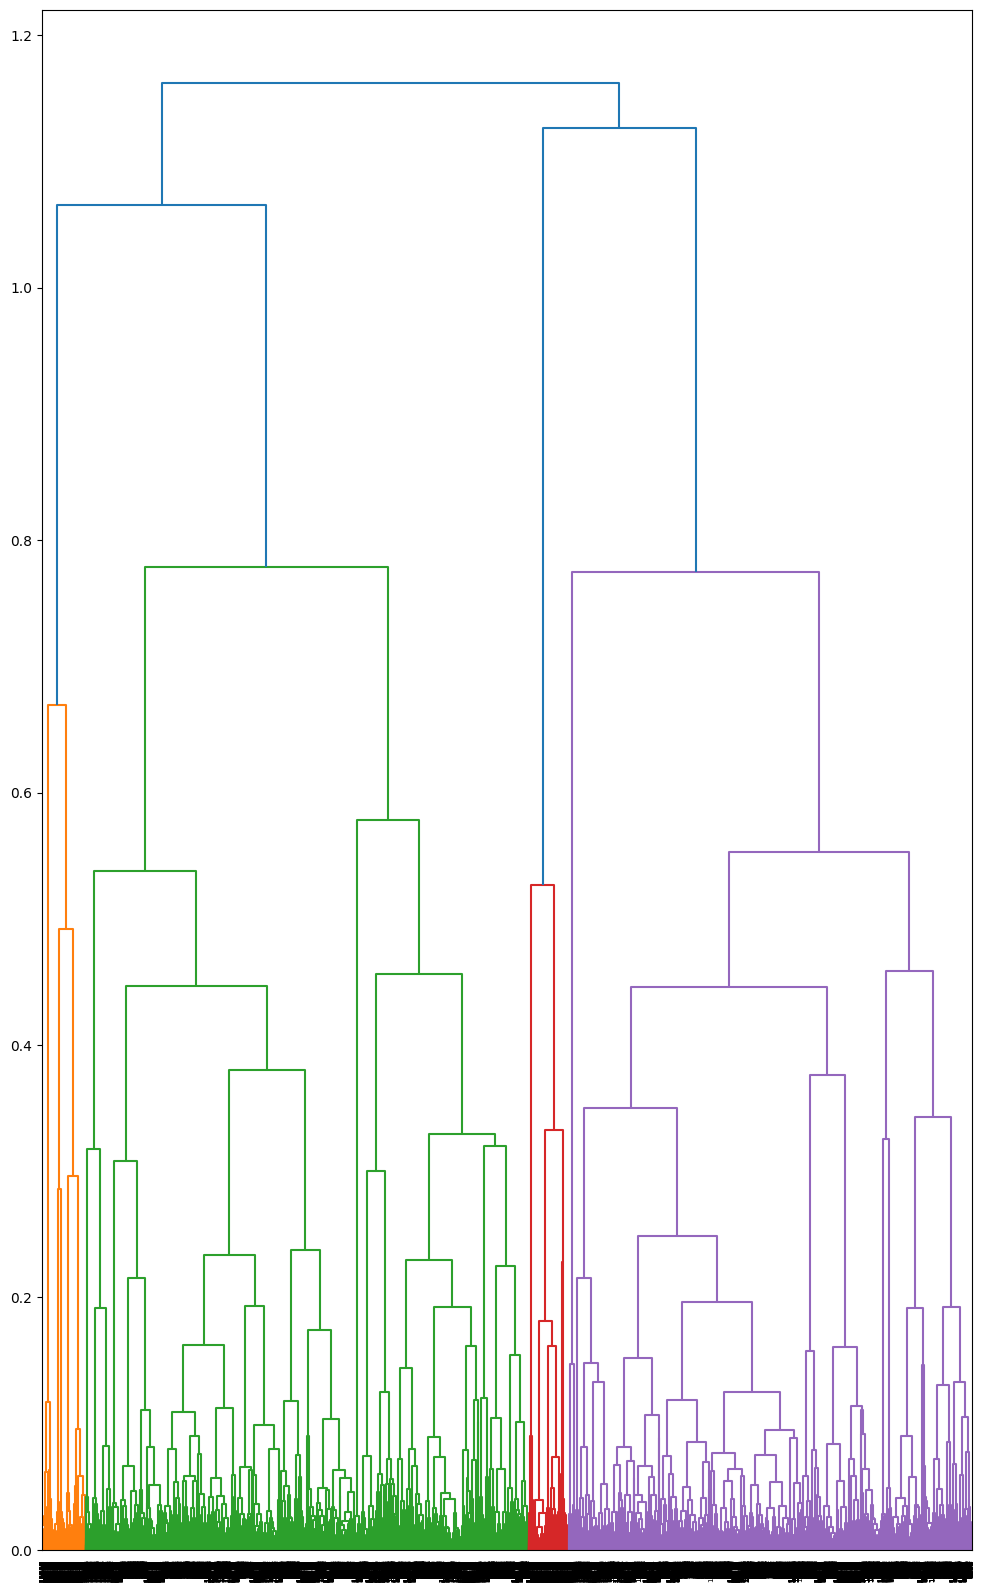

In [24]:
fig = plt.figure(figsize=(12, 20))
_ = dendrogram(Z, leaf_rotation=90)

In [33]:
#poredjenje k-means i agglomerative(average)

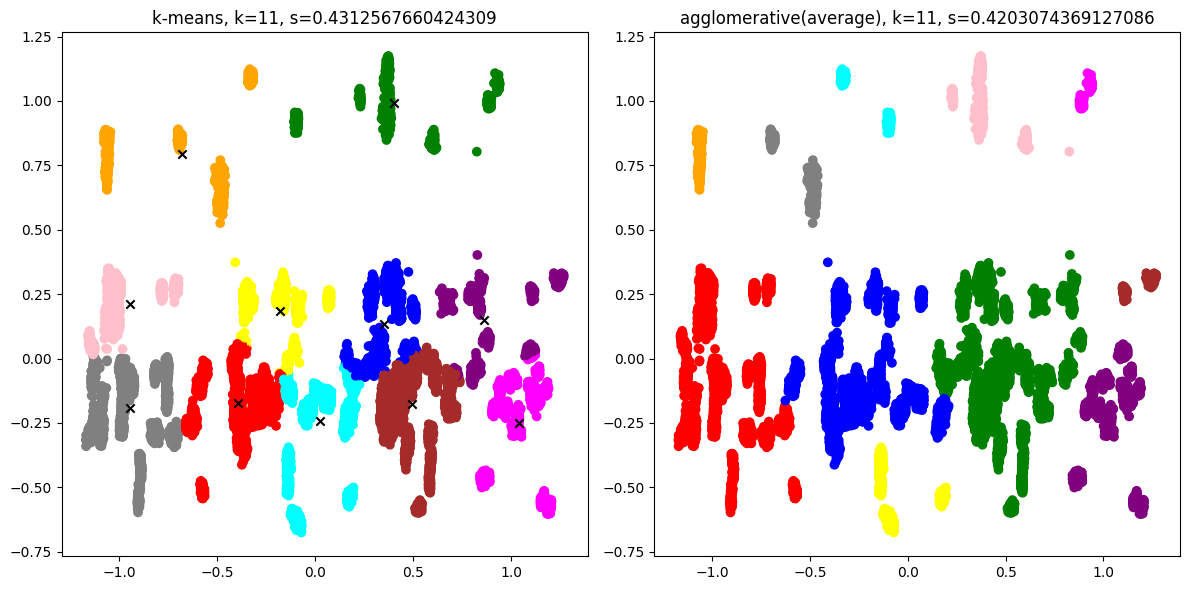

In [34]:
fig = plt.figure(figsize=(12, 6))

kmeans = KMeans(n_clusters=11, init='k-means++', n_init=10)
kmeans.fit(X_PCA2_sampled)

fig.add_subplot(1, 2, 1)
plt.scatter(X_PCA2_sampled.iloc[:, 0], X_PCA2_sampled.iloc[:, 1], c=kmeans.labels_, cmap= ListedColormap(color_list[:k]))
centroids = pd.DataFrame(kmeans.cluster_centers_)
plt.scatter(centroids.iloc[:, 0], centroids.iloc[:, 1], c='black', marker='x')
score_k = silhouette_score(X_PCA2_sampled, kmeans.labels_)
plt.title(f'k-means, k=11, s={score_k}')


ag = AgglomerativeClustering(n_clusters=11, linkage='average')
ag.fit(X_PCA2_sampled)

fig.add_subplot(1, 2, 2)
plt.scatter(X_PCA2_sampled.iloc[:, 0], X_PCA2_sampled.iloc[:, 1], c=ag.labels_, cmap= ListedColormap(color_list[:k]))
score_a = silhouette_score(X_PCA2_sampled, ag.labels_)
plt.title(f'agglomerative(average), k=11, s={score_a}')
          
plt.tight_layout()